# 1. Implement Polinomial regression on Data1.csv. Display the coefficients.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
data = pd.read_csv('Data1.csv')
print(data)

# Extract independent (X) and dependent (y) variables from the dataset
X = data[['X1', 'X2', 'X3']].values  # Independent variables
y = data['Y'].values  # Dependent variable

# Define the degree of the polynomial for polynomial regression
degree = 2

# Function to perform polynomial regression
def polynomial_regression(X, y, degree):
    # Generate the polynomial features matrix
    n_samples, n_features = X.shape
    X_poly = np.ones((n_samples, 1))

    # Create polynomial features up to the specified degree
    for d in range(1, degree + 1):
        for i in range(n_features):
            X_poly = np.concatenate((X_poly, np.power(X[:, i:i+1], d)), axis=1)

    # Normal equation: beta = (X^T * X)^-1 * X^T * y
    X_transpose = np.transpose(X_poly)
    X_transpose_X = np.dot(X_transpose, X_poly)
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = np.dot(X_transpose, y)
    coefficients = np.dot(X_transpose_X_inv, X_transpose_y)

    return coefficients

# Perform polynomial regression
coefficients = polynomial_regression(X, y, degree)

# Display the coefficients
print("Coefficients:", coefficients)


    Y  X1  X2  X3
0  43  30  63  33
1  63  45  47  52
2  71  68  67  62
3  61  46  83  42
4  81  66  84  42
5  43  36  50  66
Coefficients: [ 1.32000000e+02  1.25000000e+00 -2.35937500e+00  2.50000000e-01
 -1.95312500e-03  1.67236328e-02 -1.17187500e-02]


# 2. Apply Logistic Regression on Pima Indian Diabetes dataset to predict the output.

In [70]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for confusion matrix
from sklearn.metrics import classification_report

# Load dataset
pima = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(pima.head())

# Split dataset into features and target variable
X = pima[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Features
y = pima['label']  # Target variable

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Instantiate the logistic regression model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Fit the model with training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate and print the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  label  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3                     0.167   21      0  
4                     2.288   33      1  


C:\Users\raosu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[116,   9],
       [ 26,  41]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

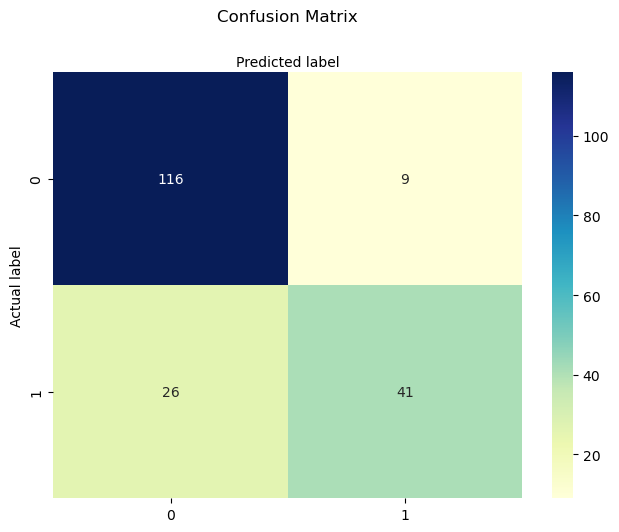

In [71]:
# Define class names for the confusion matrix
class_names = [0, 1]  # Name of classes

# Create a subplot for the confusion matrix visualization
fig, ax = plt.subplots()

# Set tick marks for the class names on both axes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create a heatmap for the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Adjust the label position of the x-axis to be on top
ax.xaxis.set_label_position("top")

# Ensure a tight layout for better visualization
plt.tight_layout()

# Set the title and axis labels for the confusion matrix
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [72]:
# Define target names for classification report
target_names = ['without diabetes', 'with diabetes']

# Print the classification report, including precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



# 3. Predict the Digits in Images Using a Logistic Regression Classifier in Python.

Accuracy: 0.9722

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy 

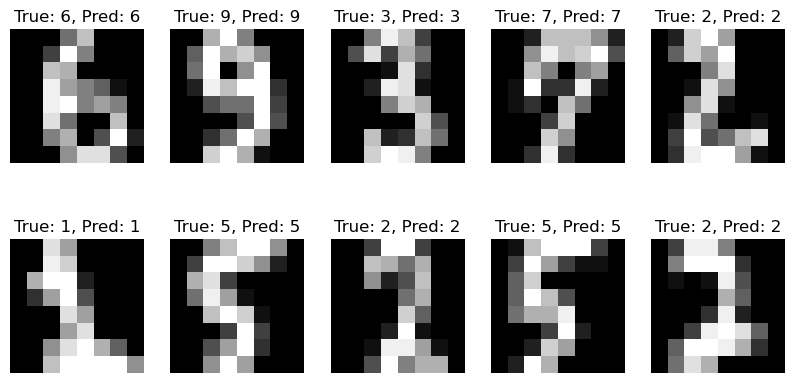

In [66]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the digits dataset
digits = load_digits()

# Separate features (X) and target variable (y)
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Visualize some of the predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')

plt.show()


# 4. Apply K-means clustering on the following data.
# x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
# y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

C:\Users\raosu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


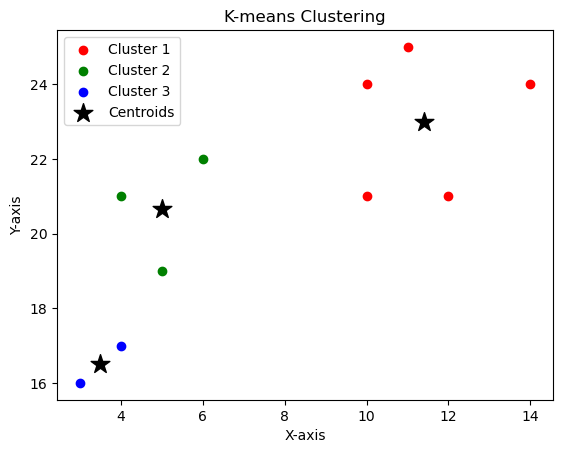

In [75]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Set the environment variable to avoid memory leak warning on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'

# Data points
x = np.array([4, 5, 10, 4, 3, 11, 14, 6, 10, 12])
y = np.array([21, 19, 24, 17, 16, 25, 24, 22, 21, 21])

# Combine x and y into one dataset
data = np.column_stack((x, y))

# Define the number of clusters (K)
k = 3

# Apply K-means clustering with explicit n_init setting to suppress FutureWarning
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(data)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters and centroids
colors = ['r', 'g', 'b']
for i in range(k):
    # Extract points for each cluster
    points = np.array([data[j] for j in range(len(data)) if labels[j] == i])
    # Scatter plot for each cluster
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], marker='o', label=f'Cluster {i+1}')

# Scatter plot for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering')
plt.legend()
plt.show()


# 5. Perform Hierarchical Clustering on Mall_Customers_data.csv. Draw the dendogram.

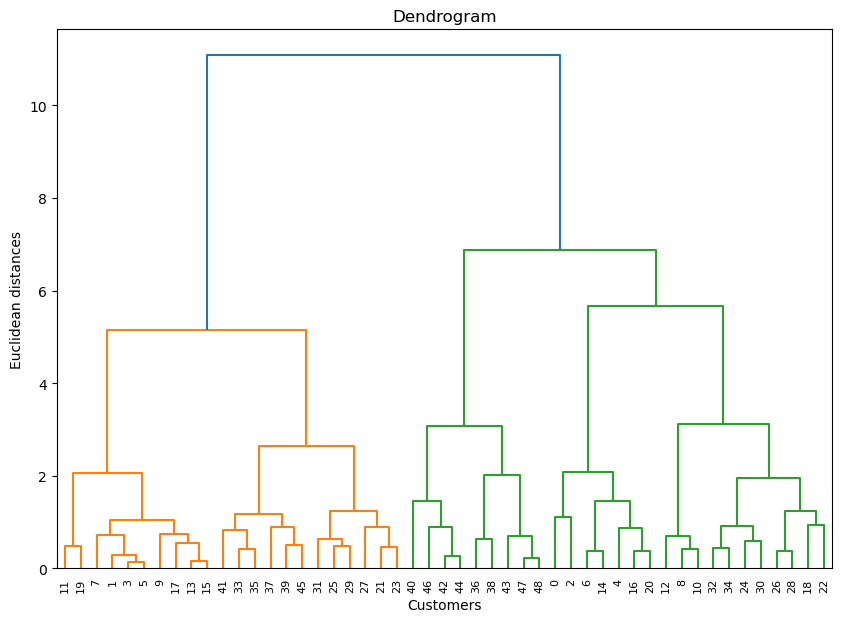

In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('C:/Users/raosu/Documents/Assignment 7 aiml/Mall_Customers_data.csv')

# Selecting relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()
